In [3]:
##1. Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
##2. Loading the Dataset
data=pd.read_csv("synthetic_text_data.csv")
X = data["text"]
y = data["label"]
y

0        Technology
1            Sports
2          Politics
3     Entertainment
4        Technology
          ...      
80       Technology
81         Politics
82    Entertainment
83       Technology
84           Sports
Name: label, Length: 85, dtype: object

In [21]:
##3. Splitting the Data
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [22]:
##4. Text Preprocessing: Converting Text to Numeric Features
vectorizer = CountVectorizer()
X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

In [23]:
##5. Training the Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_vectorizer,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [24]:
##6. Making Predictions
y_pred = model.predict(X_test_vectorizer)

Accuracy: 88.23529411764706%
confusion_matrix : [[2 0 0 0]
 [0 5 0 0]
 [0 0 2 1]
 [1 0 0 6]]


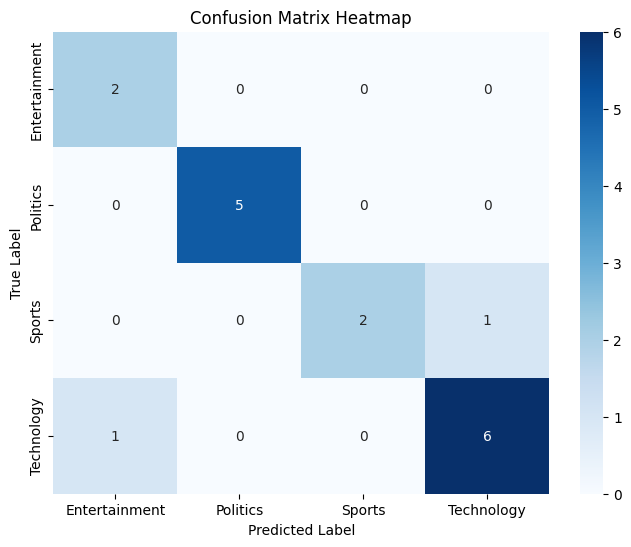

In [32]:
##7. Evaluating the Model
accuracy = accuracy_score(y_test,y_pred)
confusion_m = confusion_matrix(y_test,y_pred)

print(f'Accuracy: {accuracy *100}%')
print(f'confusion_matrix : {confusion_m}')
class_labels = np.unique(y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
##8. Prediction on Unseen Data
user_input = ("I love artificial intelligence and machine learning")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'Technology' category.


In [35]:
import joblib

# model = your trained MultinomialNB
# vectorizer = your trained CountVectorizer or TfidfVectorizer
import os

# create folder if it doesn't exist
if not os.path.exists("model"):
    os.makedirs("model")

joblib.dump(model, "model/nb_model.pkl")
joblib.dump(vectorizer, "model/vectorizer.pkl")


['model/vectorizer.pkl']